## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import datetime
from scipy import stats
import statsmodels.formula.api as smf

## Reading the DataFrame

In [ ]:
df = pd.read_csv("/content/Web Analytic_Dataset.csv")

## Data Processing

In [ ]:
import pandas as pd

def str_to_numeric(x):
    # Remove commas from the string
    x = x.str.replace(',', '')
    # Remove percentage signs from the string
    x = x.str.replace('%', '')
    # Remove '<' characters from the string
    x = x.str.replace('<', '')
    # Convert the cleaned string to numeric values
    return pd.to_numeric(x)


In [ ]:
df['Sessions'] = str_to_numeric(df["Sessions"])
print(type(df["Sessions"][0]))

<class 'numpy.int64'>


In [ ]:
df['Users'] = str_to_numeric(df["Users"])
print(type(df["Users"][0]))

<class 'numpy.int64'>


In [ ]:
df['New Users'] = str_to_numeric(df["New Users"])
print(type(df["New Users"][0]))

<class 'numpy.int64'>


In [ ]:
print(type(df["Bounce Rate"][0]))
df['Bounce Rate'] = str_to_numeric(df["Bounce Rate"])
print(type(df["Bounce Rate"][0]))

<class 'str'>
<class 'numpy.float64'>


In [ ]:
print(type(df["Pageviews"][0]))
df['Pageviews'] = str_to_numeric(df["Pageviews"])
print(type(df["Pageviews"][0]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
print(type(df["Conversion Rate (%)"][0]))
df['Conversion Rate (%)'] = str_to_numeric(df["Conversion Rate (%)"])
print(type(df["Conversion Rate (%)"][0]))

<class 'str'>
<class 'numpy.float64'>


In [ ]:
print(type(df["Transactions"][0]))
df['Transactions'] = str_to_numeric(df["Transactions"])
print(type(df["Transactions"][0]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
print(type(df["Revenue"][0]))
df['Revenue'] = str_to_numeric(df["Revenue"])
print(type(df["Revenue"][0]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
print(type(df["Quantity Sold"][0]))
df['Quantity Sold'] = str_to_numeric(df["Quantity Sold"])
print(type(df["Quantity Sold"][0]))

<class 'str'>
<class 'numpy.int64'>


In [ ]:
def convert_time(time_str):
    # Split the time string into hours, minutes, and seconds
    hours, minutes, seconds = map(int, time_str.split(':'))
    # Calculate the total number of seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

def replace_time_with_seconds(x):
    # Apply the convert_time function to each element in the series x
    x = x.apply(convert_time)
    return x


In [ ]:
print(type(df["Avg. Session Duration"][0]))
df['Avg. Session Duration'] = replace_time_with_seconds(df["Avg. Session Duration"])
print(type(df["Avg. Session Duration"][0]))

<class 'str'>
<class 'numpy.int64'>


## EDA - Exploratory Data Analysis

In [ ]:
df.head(10)

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
0,A,2019,11,126870,104020,194667,71.59,455159,71,0.20,394,83244,482
1,A,2020,5,120625,98574,194114,64.56,559509,92,0.69,1347,203552,2402
2,A,2019,10,123361,104308,181175,41.91,368907,65,0.26,477,94282,599
3,A,2019,9,106551,88428,170329,75.92,368803,61,0.18,311,54971,415
4,A,2020,6,102123,82461,163446,67.10,425410,80,0.70,1138,167113,1987
5,A,2019,12,91043,70326,142637,67.06,370798,80,0.34,486,103001,607
6,A,2020,1,83031,64103,133736,69.46,373356,83,0.45,601,128552,777
7,A,2020,7,84343,73239,125423,71.16,292263,72,0.58,730,98161,1360
8,A,2020,2,82626,68145,125318,70.06,328822,84,0.52,657,126137,981
9,A,2020,3,73844,61557,110546,72.19,266187,75,0.48,531,96195,843


In [ ]:
df.tail(10)

,Source / Medium,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
240,U,2019,9,90,83,137,0.00,465,223,18.98,26,5908,42
241,KK,2020,5,119,112,135,26.67,546,220,0.00,0,0,0
242,JJ,2020,1,94,71,135,28.89,1226,409,2.96,4,2111,5
243,EE,2019,9,77,3,133,30.83,970,335,6.02,8,1506,14
244,JJ,2020,5,109,91,132,33.33,840,279,0.76,1,130,1
245,AA,2020,5,111,97,131,61.07,324,86,0.00,0,0,0
246,K,2020,2,112,81,130,68.46,297,80,0.00,0,0,0
247,JJ,2019,12,117,90,129,29.46,1000,336,0.78,1,81,1
248,K,2020,3,111,70,127,62.20,397,87,0.79,1,77,1
249,euromessage / push,2020,5,99,1,125,60.80,396,104,0.00,0,0,0


In [ ]:
df.size

3250

In [ ]:
df.shape

(250, 13)

In [ ]:
df.shape[0]

250

In [ ]:
df.nunique

<bound method DataFrame.nunique of         Source / Medium  Year  Month of the year   Users  New Users  Sessions  \
0                     A  2019                 11  126870     104020    194667   
1                     A  2020                  5  120625      98574    194114   
2                     A  2019                 10  123361     104308    181175   
3                     A  2019                  9  106551      88428    170329   
4                     A  2020                  6  102123      82461    163446   
..                  ...   ...                ...     ...        ...       ...   
245                  AA  2020                  5     111         97       131   
246                   K  2020                  2     112         81       130   
247                  JJ  2019                 12     117         90       129   
248                   K  2020                  3     111         70       127   
249  euromessage / push  2020                  5      99          1       125   

     Bounce Rate  Pageviews  Avg. Session Duration  Conversion Rate (%)  \
0          71.59     455159                     71                 0.20   
1          64.56     559509                     92                 0.69   
2          41.91     368907                     65                 0.26   
3          75.92     368803                     61                 0.18   
4          67.10     425410                     80                 0.70   
..           ...        ...                    ...                  ...   
245        61.07        324                     86                 0.00   
246        68.46        297                     80                 0.00   
247        29.46       1000                    336                 0.78   
248        62.20        397                     87                 0.79   
249        60.80        396                    104                 0.00   

     Transactions  Revenue  Quantity Sold  
0             394    83244            482  
1            1347   203552           2402  
2             477    94282            599  
3             311    54971            415  
4            1138   167113           1987  
..            ...      ...            ...  
245             0        0              0  
246             0        0              0  
247             1       81              1  
248             1       77              1  
249             0        0              0  

[250 rows x 13 columns]>

In [ ]:
df.columns

Index(['Source / Medium', 'Year', 'Month of the year', 'Users', 'New Users',
       'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration',
       'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold'],
      dtype='object')

In [ ]:
df.describe()

,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Avg. Session Duration,Conversion Rate (%),Transactions,Revenue,Quantity Sold
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2019.644000,6.540000,11295.556000,8743.856000,16091.296000,49.311000,44112.144000,152.340000,3.138000,85.052000,14772.776000,150.104000
std,0.479776,3.507937,24516.361198,20584.145069,35614.955967,20.234375,93892.520116,78.026772,8.124769,177.891853,29755.532131,328.209915
min,2019.000000,1.000000,41.000000,1.000000,125.000000,0.000000,237.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,4.000000,302.250000,144.250000,395.250000,34.990000,1382.000000,91.250000,0.132500,1.250000,218.750000,2.000000
50%,2020.000000,6.000000,850.500000,482.500000,1138.000000,52.760000,4440.500000,133.000000,0.410000,7.500000,1373.500000,14.000000
75%,2020.000000,10.000000,7836.000000,3687.750000,10214.250000,61.790000,31878.250000,204.250000,0.780000,82.500000,14714.250000,127.500000
max,2020.000000,12.000000,126870.000000,104308.000000,194667.000000,98.630000,559509.000000,409.000000,42.080000,1347.000000,203552.000000,2402.000000


In [ ]:
df.isnull().sum()

Source / Medium          0
Year                     0
Month of the year        0
Users                    0
New Users                0
Sessions                 0
Bounce Rate              0
Pageviews                0
Avg. Session Duration    0
Conversion Rate (%)      0
Transactions             0
Revenue                  0
Quantity Sold            0
dtype: int64

In [ ]:
import pandas as pd
from tabulate import tabulate

# Select numeric columns of interest
df_numeric = df[['Users', 'New Users', 'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration', 'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold']]

# Calculate statistics for the selected numeric columns
df_statistics = pd.DataFrame({'Mean': df_numeric.mean(),
                              'Median': df_numeric.median(),
                              'Mode': df_numeric.mode().iloc[0]})

# Print statistics in a formatted table
print(tabulate(df_statistics, headers='keys', tablefmt='fancy_grid'))


╒═══════════════════════╤═══════════╤══════════╤════════╕
│                       │      Mean │   Median │   Mode │
╞═══════════════════════╪═══════════╪══════════╪════════╡
│ Users                 │ 11295.6   │   850.5  │     86 │
├───────────────────────┼───────────┼──────────┼────────┤
│ New Users             │  8743.86  │   482.5  │      1 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Sessions              │ 16091.3   │  1138    │    135 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Bounce Rate           │    49.311 │    52.76 │      0 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Pageviews             │ 44112.1   │  4440.5  │   1188 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Avg. Session Duration │   152.34  │   133    │    180 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Conversion Rate (%)   │     3.138 │     0.41 │      0 │
├───────────────────────┼───────────┼──────────┼────────┤
│ Transactions

## Visualization

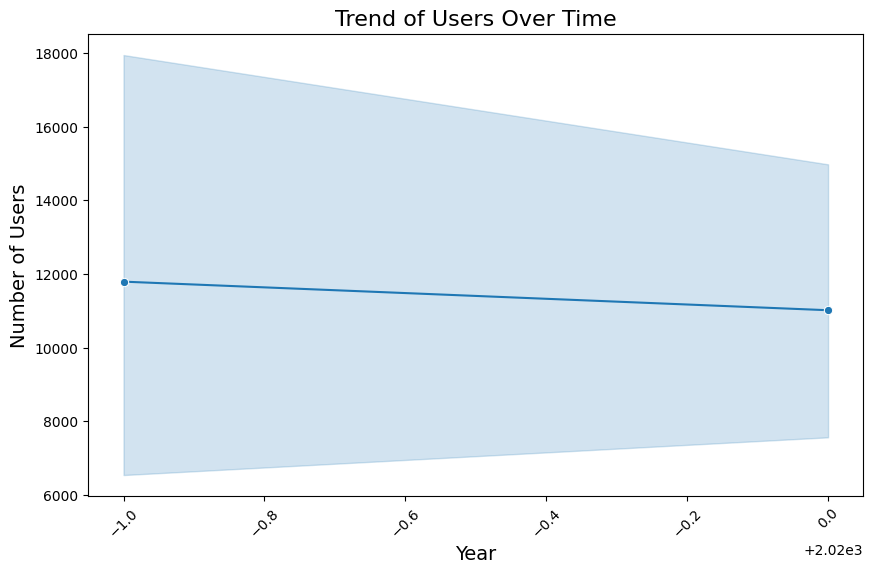

In [ ]:
# Set 'Year' as the index of the DataFrame
data = df.set_index('Year')

# Create a line plot to visualize the trend of 'Users' over time using seaborn library
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=data.index, y='Users', marker='o')

# Set title and labels for the plot
plt.title('Trend of Users Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

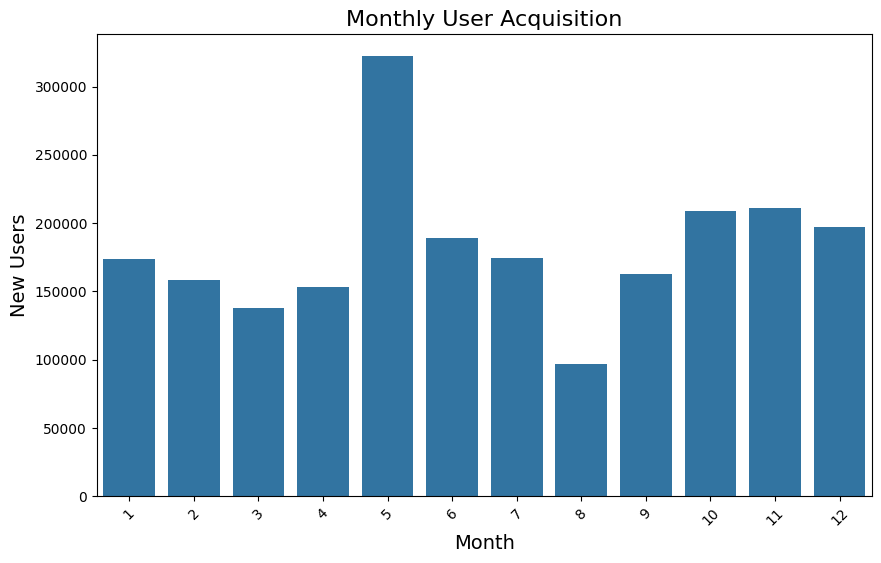

In [ ]:
# Group the DataFrame by 'Month of the year' and sum up the 'New Users' for each month
monthly_users = df.groupby('Month of the year')['New Users'].sum().reset_index()

# Create a bar plot to visualize monthly user acquisition using seaborn library
plt.figure(figsize=(10, 6))
sns.barplot(x='Month of the year', y='New Users', data=monthly_users)

# Set title and labels for the plot
plt.title('Monthly User Acquisition', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('New Users', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

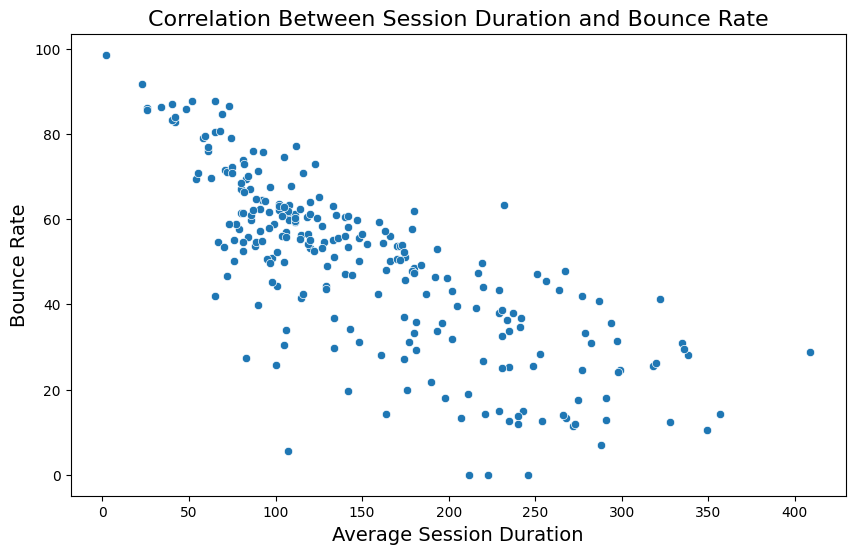

In [ ]:
# Create a scatter plot to visualize the relationship between 'Avg. Session Duration' and 'Bounce Rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. Session Duration', y='Bounce Rate', data=df)

# Set title and labels for the plot
plt.title('Correlation Between Session Duration and Bounce Rate', fontsize=16)
plt.xlabel('Average Session Duration', fontsize=14)
plt.ylabel('Bounce Rate', fontsize=14)

# Display the plot
plt.show()


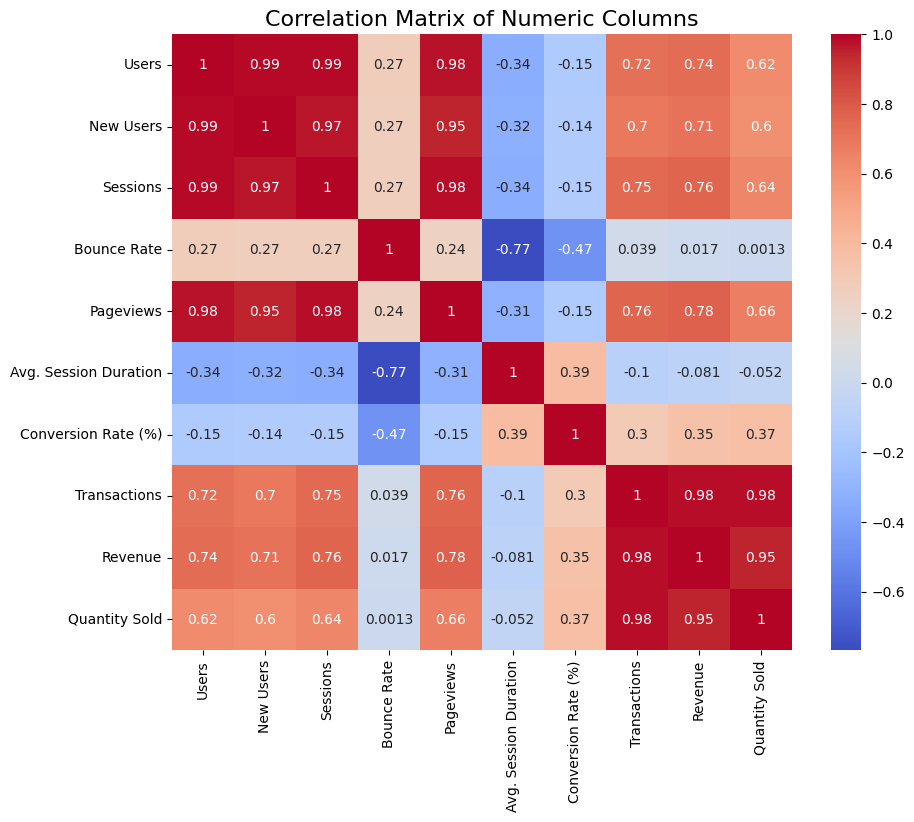

In [ ]:
# Define a list of numeric columns
numeric_cols = ['Users', 'New Users', 'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration', 'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold']

# Calculate the correlation matrix for the numeric columns
corr_matrix = df[numeric_cols].corr()

# Plot a heatmap to visualize the correlation matrix using seaborn library
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set title for the plot
plt.title('Correlation Matrix of Numeric Columns', fontsize=16)

# Display the plot
plt.show()

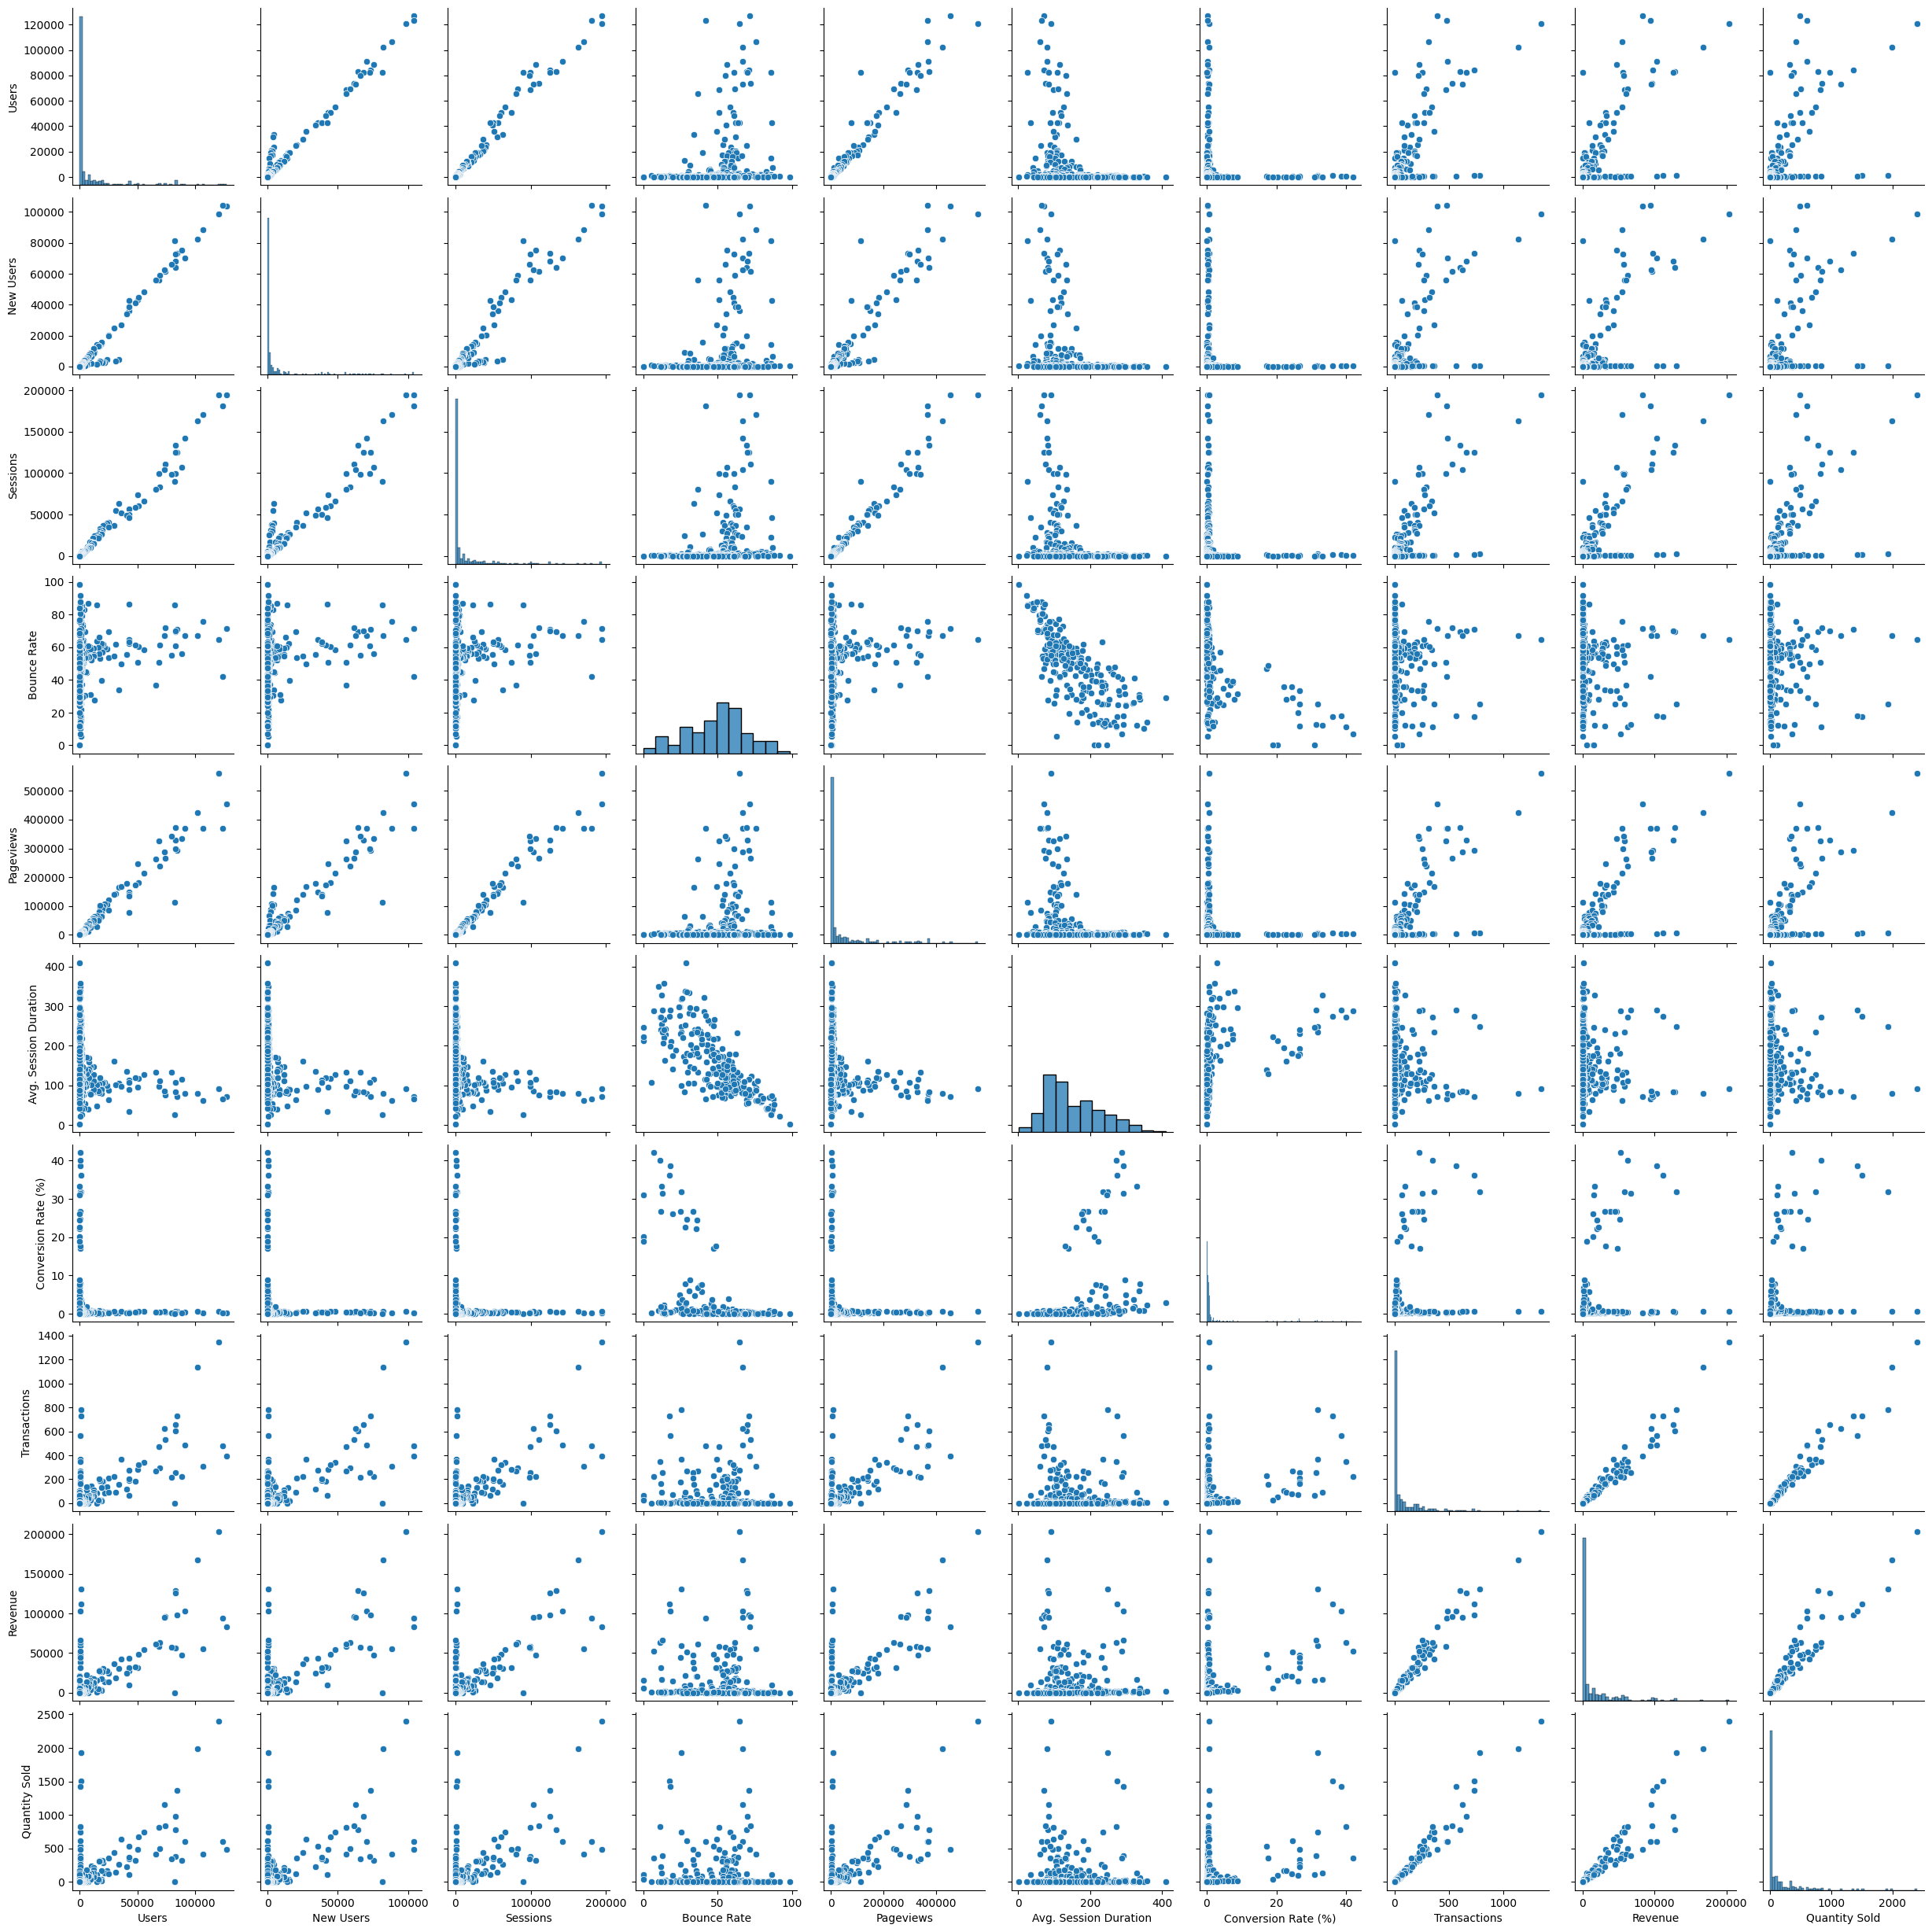

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot using seaborn library
sns.pairplot(df, vars=['Users', 'New Users', 'Sessions', 'Bounce Rate', 'Pageviews', 'Avg. Session Duration', 'Conversion Rate (%)', 'Transactions', 'Revenue', 'Quantity Sold'])

# Show the pairplot
plt.show()


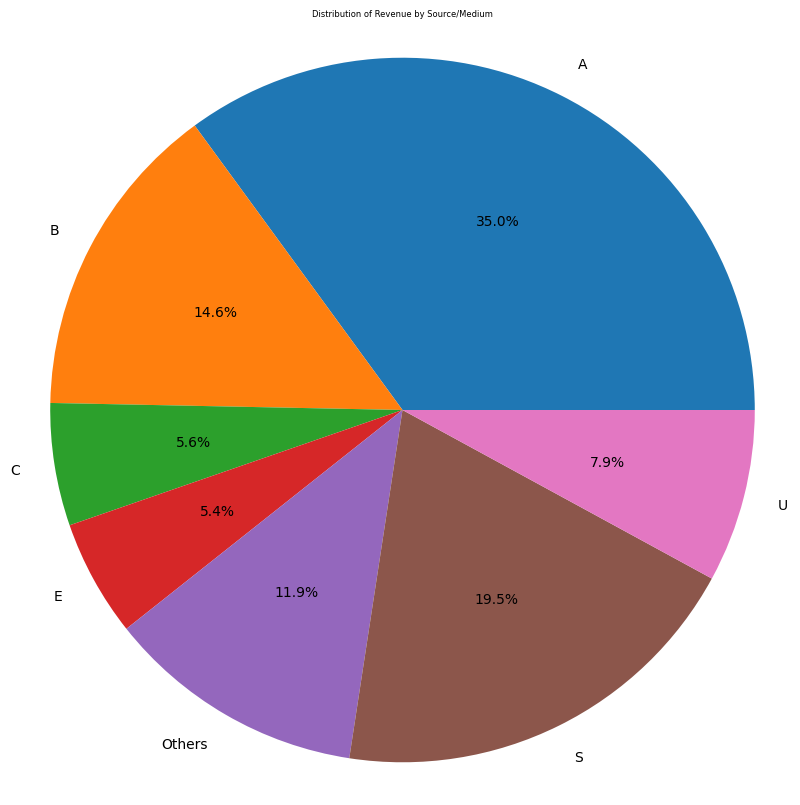

In [ ]:
revenue_by_source = df.groupby('Source / Medium')['Revenue'].sum().reset_index()

# Calculate percentage of revenue for each source/medium
revenue_by_source['Percentage'] = revenue_by_source['Revenue'] / revenue_by_source['Revenue'].sum() * 100

# Replace sources with less than 5% revenue with 'Others'
revenue_by_source.loc[revenue_by_source['Percentage'] < 5, 'Source / Medium'] = 'Others'

# Group by the modified source/medium column and sum the revenue
revenue_by_source = revenue_by_source.groupby('Source / Medium')['Revenue'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(revenue_by_source['Revenue'], labels=revenue_by_source['Source / Medium'], autopct='%1.1f%%')
plt.title('Distribution of Revenue by Source/Medium', fontsize=6)
plt.axis('equal')
plt.show()


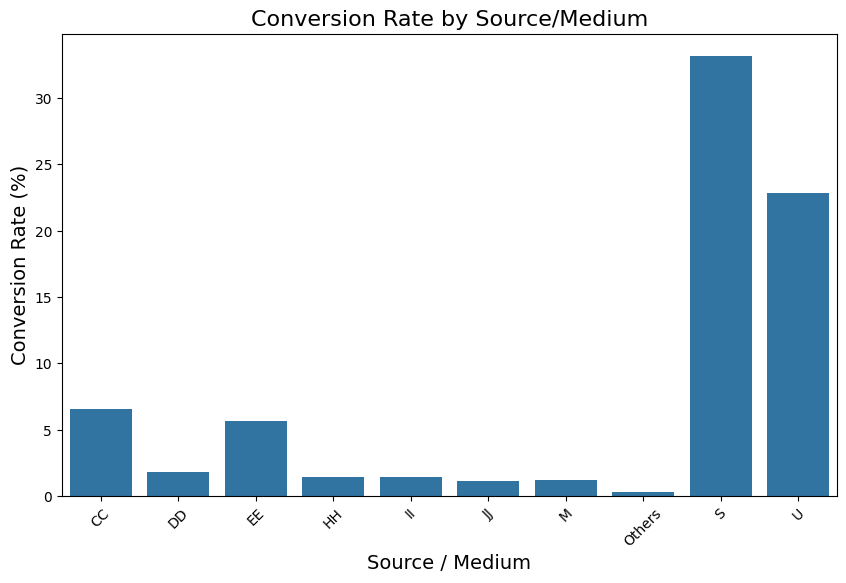

In [ ]:
conversion_by_source = df.groupby('Source / Medium')['Conversion Rate (%)'].mean().reset_index()

# Replace sources with less than 1% conversion rate with 'Others'
conversion_by_source.loc[conversion_by_source['Conversion Rate (%)'] < 1, 'Source / Medium'] = 'Others'

# Group by the modified source/medium column and calculate the mean conversion rate
conversion_by_source = conversion_by_source.groupby('Source / Medium')['Conversion Rate (%)'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Source / Medium', y='Conversion Rate (%)', data=conversion_by_source)
plt.title('Conversion Rate by Source/Medium', fontsize=16)
plt.xlabel('Source / Medium', fontsize=14)
plt.ylabel('Conversion Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

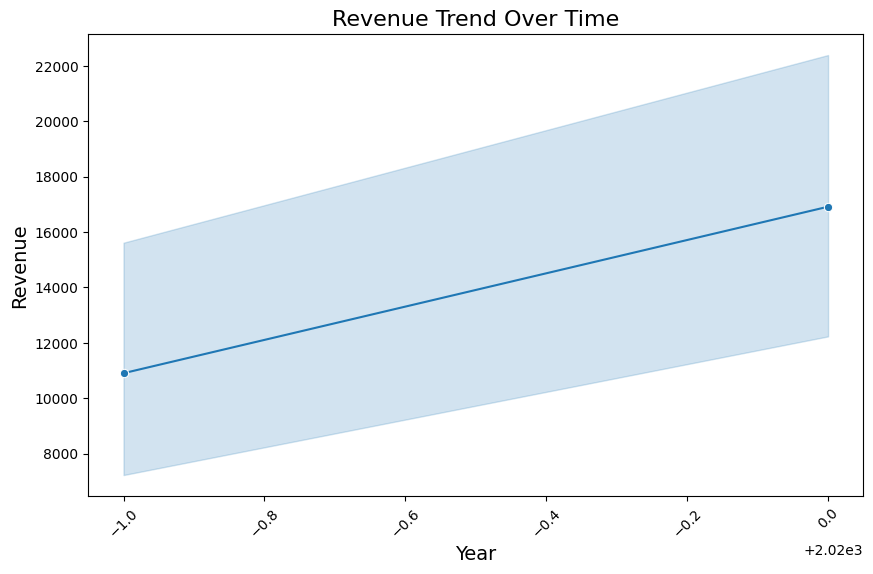

In [ ]:
data = df.set_index('Year')  # Set 'Year' as the index

# Create a line plot for 'Revenue' over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x=data.index, y='Revenue', marker='o')
plt.title('Revenue Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.show()

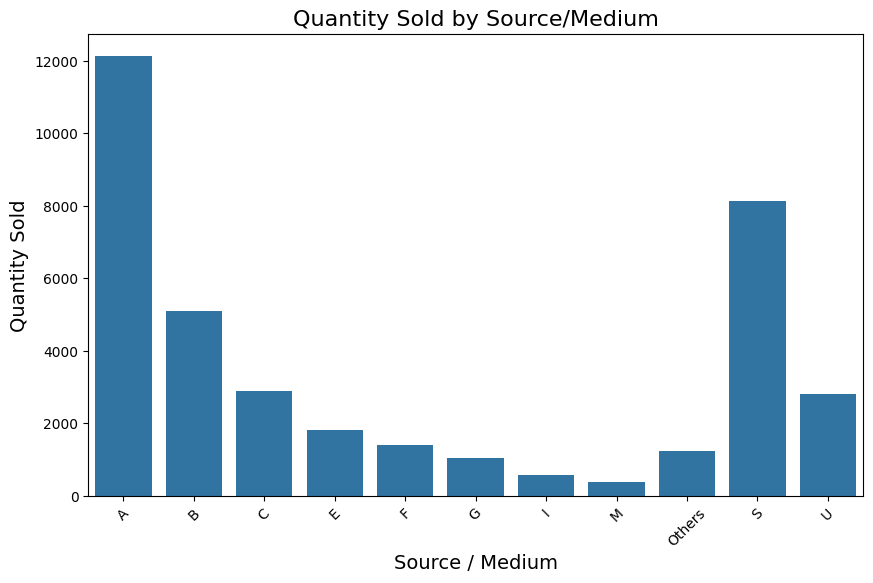

In [ ]:
# Group the DataFrame by 'Source / Medium' and sum up the 'Quantity Sold' for each source/medium
quantity_by_source = df.groupby('Source / Medium')['Quantity Sold'].sum().reset_index()

# Calculate percentage of quantity sold for each source/medium
total_quantity_sold = quantity_by_source['Quantity Sold'].sum()
quantity_by_source['Percentage'] = quantity_by_source['Quantity Sold'] / total_quantity_sold * 100

# Replace sources with less than 1% of total quantity sold with 'Others'
quantity_by_source.loc[quantity_by_source['Percentage'] < 1, 'Source / Medium'] = 'Others'

# Group by the modified source/medium column and sum the quantity sold
quantity_by_source = quantity_by_source.groupby('Source / Medium')['Quantity Sold'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Source / Medium', y='Quantity Sold', data=quantity_by_source)
plt.title('Quantity Sold by Source/Medium', fontsize=16)
plt.xlabel('Source / Medium', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

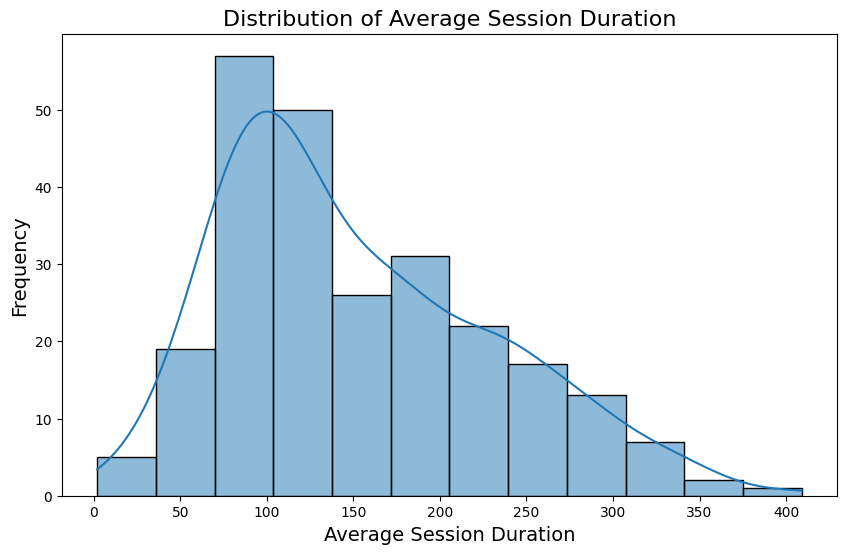

In [ ]:
# Create a histogram to visualize the distribution of 'Avg. Session Duration' using seaborn library
plt.figure(figsize=(10, 6))
sns.histplot(df['Avg. Session Duration'], kde=True)

# Set title and labels for the plot
plt.title('Distribution of Average Session Duration', fontsize=16)
plt.xlabel('Average Session Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

## Hypothesis
- t test
- normal test
- pearson test
- kruskal test
- chi square test

### Hypothesis 1: Test if the average revenue is equal to a specific value

In [ ]:
H0 = "The average revenue is equal to $15,000"
H1 = "The average revenue is not equal to $15,000"
test_statistic, p_value = stats.ttest_1samp(df['Revenue'], 15000)
print(f"Hypothesis 1: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 1: p-value = 0.9040
Fail to reject H0. The average revenue is equal to $15,000


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0). Therefore, it cannot be concluded that the average revenue is significantly different from $15,000.

### Hypothesis 2: Test if the average session duration is different between the sources "U" and "AA"

In [ ]:
source_A = df[df['Source / Medium'] == 'U']['Avg. Session Duration']
source_B = df[df['Source / Medium'] == 'AA']['Avg. Session Duration']
H0 = "The average session duration is the same for sources U and AA"
H1 = "The average session duration is different for sources U and AA"
test_statistic, p_value = stats.ttest_ind(source_A, source_B)
print(f"Hypothesis 2: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 2: p-value = 0.0236
Reject H0. The average session duration is different for sources U and AA


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that the average session duration is significantly different for sources U and AA.

### Hypothesis 3: Test if the bounce rate is normally distributed

In [ ]:
H0 = "The bounce rate is normally distributed"
H1 = "The bounce rate is not normally distributed"
test_statistic, p_value = stats.normaltest(df['Bounce Rate'])
print(f"Hypothesis 3: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 3: p-value = 0.1060
Fail to reject H0. The bounce rate is normally distributed


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0). Therefore, we conclude that the bounce rate is normally distributed.

### Hypothesis 4: Test if the conversion rate is correlated with the number of transactions


In [ ]:
H0 = "There is no correlation between conversion rate and number of transactions"
H1 = "There is a correlation between conversion rate and number of transactions"
correlation, p_value = stats.pearsonr(df['Conversion Rate (%)'], df['Transactions'])
print(f"Hypothesis 4: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 4: p-value = 0.0000
Reject H0. There is a correlation between conversion rate and number of transactions


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that there is a statistically significant correlation between conversion rate and number of transactions.

### Hypothesis 5: Test if the number of new users is different across months


In [ ]:
H0 = "The number of new users is the same across months"
H1 = "The number of new users is different across months"
groups = df.groupby('Month of the year')['New Users'].apply(list)
test_statistic, p_value = stats.kruskal(*groups)
print(f"Hypothesis 5: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 5: p-value = 0.9914
Fail to reject H0. The number of new users is the same across months


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0). Therefore, we conclude that the number of new users is same across months.

### Hypothesis 6: Test if the quantity sold follows a Poisson distribution

In [ ]:
H0 = "The quantity sold follows a Poisson distribution"
H1 = "The quantity sold does not follow a Poisson distribution"
test_statistic, p_value = stats.chisquare(df['Quantity Sold'], ddof=1)
print(f"Hypothesis 6: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 6: p-value = 0.0000
Reject H0. The quantity sold does not follow a Poisson distribution


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that the quantity sold does not follow a Poisson distribution.

### Hypothesis 7: Test if the revenue is different among different sourcesusers


In [ ]:
mobile = df[df['Source / Medium'].str.contains('EE')]
desktop = df[~df['Source / Medium'].str.contains('B')]
H0 = "The revenue is the same among EE and B sources"
H1 = "The revenue is different among EE and B sources"
test_statistic, p_value = stats.ttest_ind(mobile['Revenue'], desktop['Revenue'])
print(f"Hypothesis 7: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 7: p-value = 0.3644
Fail to reject H0. The revenue is the same among EE and B sources


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0). Therefore, we conclude that the revenue is same among EE and B sources.

### Hypothesis 8: Test if the bounce rate is different across years

In [ ]:
H0 = "The bounce rate is the same across years"
H1 = "The bounce rate is different across years"
groups = df.groupby('Year')['Bounce Rate'].apply(list)
test_statistic, p_value = stats.kruskal(*groups)
print(f"Hypothesis 8: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 8: p-value = 0.0014
Reject H0. The bounce rate is different across years


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that the bounce rate is different across years.

### Hypothesis 9: Test if the revenue follows a normal distribution

In [ ]:
H0 = "The revenue is normally distributed"
H1 = "The revenue is not normally distributed"
test_statistic, p_value = stats.normaltest(df['Revenue'])
print(f"Hypothesis 9: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 9: p-value = 0.0000
Reject H0. The revenue is not normally distributed


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that the revenue is not normally distributed.

### Hypothesis 10: Test if the session duration is correlated with the number of pageviews

In [ ]:
H0 = "There is no correlation between session duration and number of pageviews"
H1 = "There is a correlation between session duration and number of pageviews"
correlation, p_value = stats.spearmanr(df['Avg. Session Duration'], df['Pageviews'])
print(f"Hypothesis 10: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 10: p-value = 0.0000
Reject H0. There is a correlation between session duration and number of pageviews


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis (H0). Therefore, it can be concluded that there is a statistically significant correlation between session duration and number of pageviews.

### Hypothesis 11: Test if the average pageviews is the same across different years

In [ ]:
H0 = "The average pageviews is the same across different years"
H1 = "The average pageviews is different across different years"
groups = df.groupby('Year')['Pageviews'].apply(list)
test_statistic, p_value = stats.kruskal(*groups)
print(f"Hypothesis 11: p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject H0.", H1)
else:
    print("Fail to reject H0.", H0)

Hypothesis 11: p-value = 0.8802
Fail to reject H0. The average pageviews is the same across different years


Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0). Therefore, we conclude that the average pageviews is same across different years.

## Linear Regression

In [ ]:
df["Conversion_Rate"] = df["Conversion Rate (%)"]

In [ ]:
df["New_Users"] = df["New Users"]

In [ ]:
df["Quantity_Sold"] = df["Quantity Sold"]

In [ ]:
!pip install statsmodels --q

In [ ]:
print(smf.ols(formula="Revenue ~ Quantity_Sold", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     2360.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.03e-128
Time:                        03:33:25   Log-Likelihood:                -2635.3
No. Observations:                 250   AIC:                             5275.
Df Residuals:                     248   BIC:                             5282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1827.4920    639.626      2.857

In [ ]:
print(smf.ols(formula="Revenue ~ Transactions", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     6606.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          9.35e-181
Time:                        03:33:34   Log-Likelihood:                -2514.5
No. Observations:                 250   AIC:                             5033.
Df Residuals:                     248   BIC:                             5040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      806.1052    397.745      2.027   

In [ ]:
print(smf.ols(formula="Revenue ~ Pageviews + Sessions + New_Users + Users ", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           4.25e-53
Time:                        03:34:40   Log-Likelihood:                -2801.9
No. Observations:                 250   AIC:                             5614.
Df Residuals:                     245   BIC:                             5631.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5020.5305   1287.411      3.900      0.0

In [ ]:
model = smf.ols(formula="Revenue ~ Transactions + Quantity_Sold + Pageviews + Sessions + New_Users + Users ", data=df).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1300.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.54e-181
Time:                        05:45:10   Log-Likelihood:                -2492.0
No. Observations:                 250   AIC:                             4998.
Df Residuals:                     243   BIC:                             5023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       341.2859    385.046      0.886

**R-squared**: The R-squared value of 0.970 indicates that approximately 97% of the variance in revenue is explained by the independent variables included in the model. This suggests a strong explanatory power of the model in predicting revenue based on the given predictors.

**P-values**: The p-values associated with the coefficients of the independent variables are all less than 0.05, indicating that they are statistically significant predictors of revenue. Specifically, variables such as Transactions, Quantity_Sold, Sessions, New_Users, and Users all have significant effects on revenue.

**F-statistic**: The F-statistic has a very low p-value (1.54e-181), indicating that the overall model is statistically significant. This suggests that the combination of independent variables significantly predicts the variation in revenue.

In [ ]:
import pandas as pd
dummy_data = pd.DataFrame({'Transactions': [100, 200],
                              'Quantity_Sold': [50, 100],
                              'Pageviews': [1000, 2000],
                              'Sessions': [500, 1000],
                              'New_Users': [50, 100],
                              'Users': [1000, 2000]})
predicted_revenue = model.predict(dummy_data)
print(predicted_revenue)


0    24217.032987
1    48092.780048
dtype: float64
